In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width: 10% !important; height: 10% !important;} </style>"
HTML(style)

In [27]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
X = titanic_data.drop(['PassengerId','Survived','Name', 'Ticket', 'Cabin'], axis=1)

In [30]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [31]:
y=titanic_data.Survived

In [32]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [33]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [34]:
X.Age.median()
X= X.fillna({'Age': X.Age.median()})

In [35]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

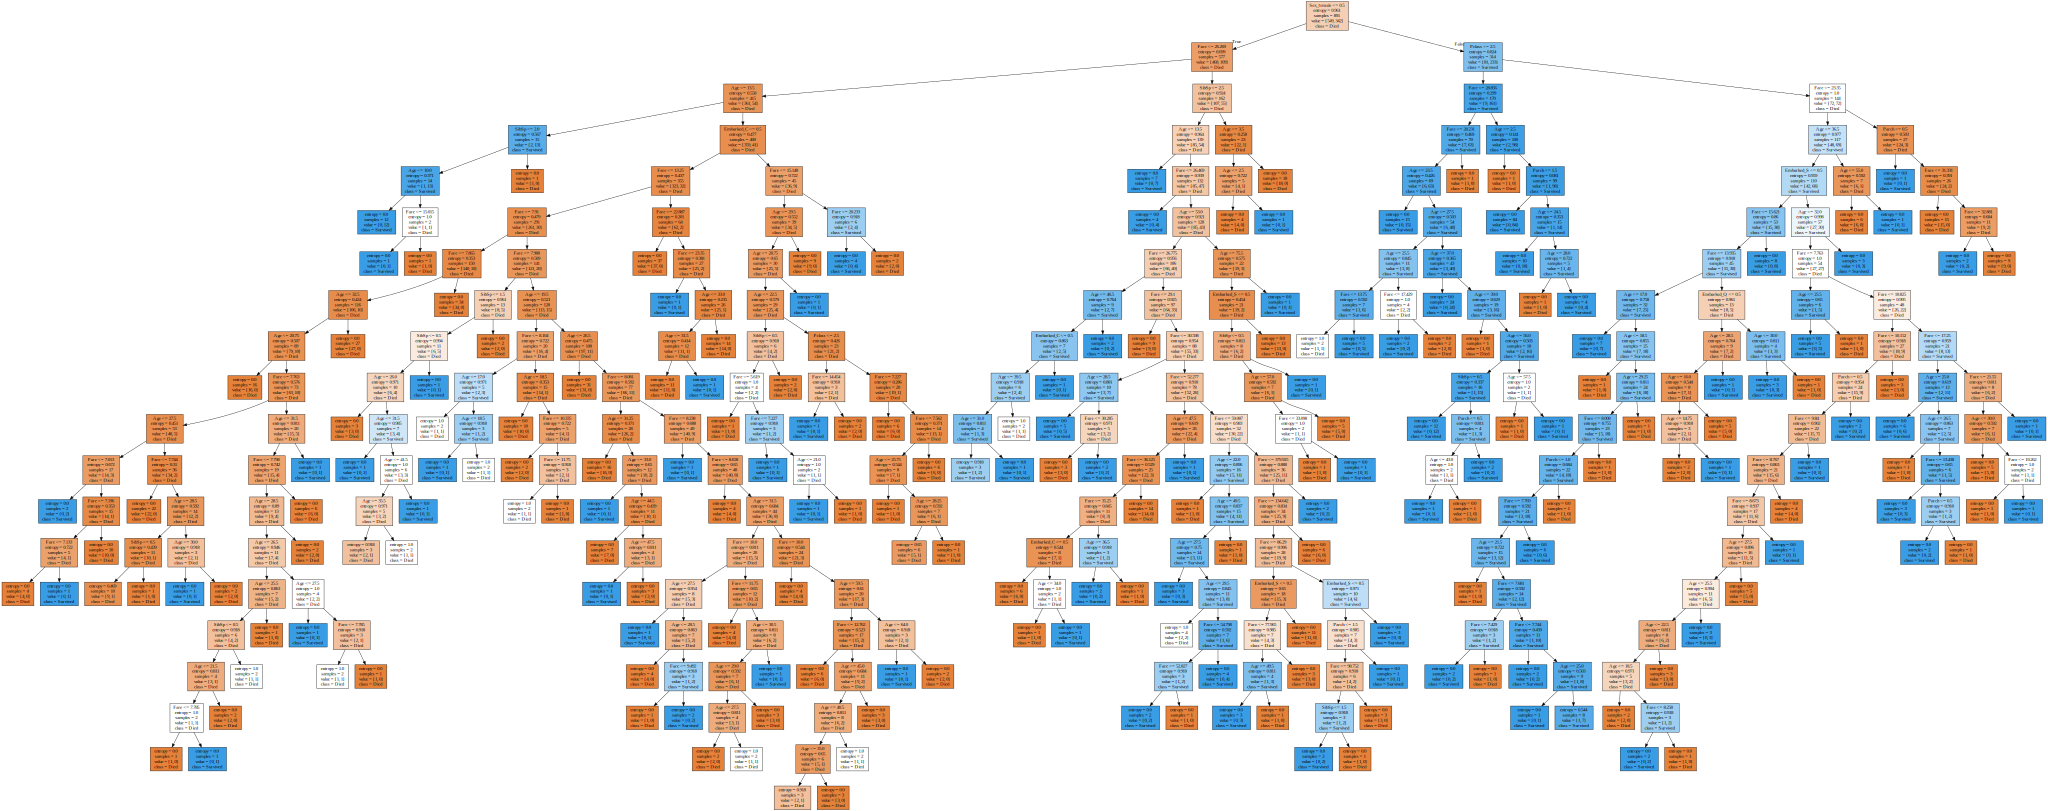

In [39]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [43]:
clf.score(X,y)

0.9797979797979798

In [44]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
clf.score(X_train, y_train)

0.9798657718120806

In [46]:
clf.score(X_test, y_test)

0.7728813559322034

In [47]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=5)

In [48]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8406040268456376

In [49]:
clf.score(X_test, y_test)

0.8101694915254237

In [82]:
max_depth_value = range(1,30)

In [83]:
scores_data = pd.DataFrame()

In [84]:
for max_depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score=cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score], 'test_score':[test_score], 'cross_val_score':[mean_cross_val_score]})
    scores_data  = scores_data.append(temp_score_data)

In [85]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.798622


In [86]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score','cross_val_score'], var_name = 'set_type', value_name = 'score')

In [87]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


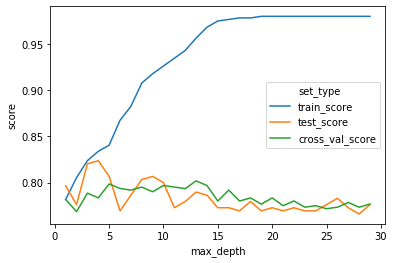

In [88]:
sns.lineplot(x = 'max_depth', y='score', hue ='set_type', data = scores_data_long)

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=4)

In [71]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7835799743626264

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target
X_train = pd.DataFrame(X)
y_train = pd.DataFrame(y)

clf = DecisionTreeClassifier(criterion ='entropy')
parameter_grid = {
            'min_split': [2,3,4,5,6,7,8,9,10],
            'max_depth': [1,2,3,4,5,6,7,8,9,10],
            'min_leaf': [1,2,3,4,5,6,7,8,9,10]
        }


search = GridSearchCV(clf, parameter_grid, cv=5)
search.fit(X_train, y_train)


ValueError: Invalid parameter min_leaf for estimator DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

In [28]:
X_train.head()


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
